In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import geopandas as gpd
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [3]:
%matplotlib inline

# Import data set

In [4]:
df = pd.read_csv('food_coded.csv')

# Removing all the features that are not needed.
# all the non numerical, and features that have little effect on,
# deciding a place to live, are removed.

In [5]:
droping = ['GPA',
 'Gender',
 'breakfast',
 'calories_chicken',
 'calories_day',
 'calories_scone',
 'coffee',
 'comfort_food',
 'comfort_food_reasons',
 'comfort_food_reasons_coded',
 'comfort_food_reasons_coded.1',
 'cuisine',
 'diet_current',
 'diet_current_coded',
 'drink',
 'eating_changes',
 'eating_changes_coded',
 'eating_changes_coded1',
 'father_education',
 'father_profession',
 'fav_cuisine',
 'fav_cuisine_coded',
 'fav_food',
 'food_childhood',
 'fries',
 'grade_level',
 'greek_food',
 'healthy_feeling',
 'healthy_meal',
 'ideal_diet',
 'ideal_diet_coded',
 'indian_food',
 'italian_food',
 'life_rewarding',
 'marital_status',
 'meals_dinner_friend',
 'mother_education',
 'mother_profession',
 'nutritional_check',
 'persian_food',
 'self_perception_weight',
 'soup','thai_food',
 'tortilla_calories',
 'turkey_calories',
 'type_sports','vitamins',
 'waffle_calories',
 'weight']
df3 = df.drop(droping, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   parents_cook   125 non-null    int64  
 9   pay_meal_out   125 non-null    int64  
 10  sports         123 non-null    float64
 11  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 11.8 KB


# Replacing all the null values with the current mean of the features

In [6]:
m1, m2, m3, m4, m5, m6 = 0, 0, 0, 0, 0, 0
m1, m2, m3, m4, m5, m6 = df3['employment'].mean(), df3['exercise'].mean(),df3['income'].mean(), df3['on_off_campus'].mean(), df3['sports'].mean(), df3['cook'].mean()
df3['employment'].fillna(m1, inplace=True)
df3['exercise'].fillna(m2, inplace=True)
df3['income'].fillna(m3, inplace=True)
df3['on_off_campus'].fillna(m4, inplace=True)
df3['sports'].fillna(m5, inplace=True)
df3['cook'].fillna(m6, inplace=True)

In [7]:
df3.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,parents_cook,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,1,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,1,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,1,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,1,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,1,4,1.0,4


# Visualizing using the 'boxplot' of the seaborn library.

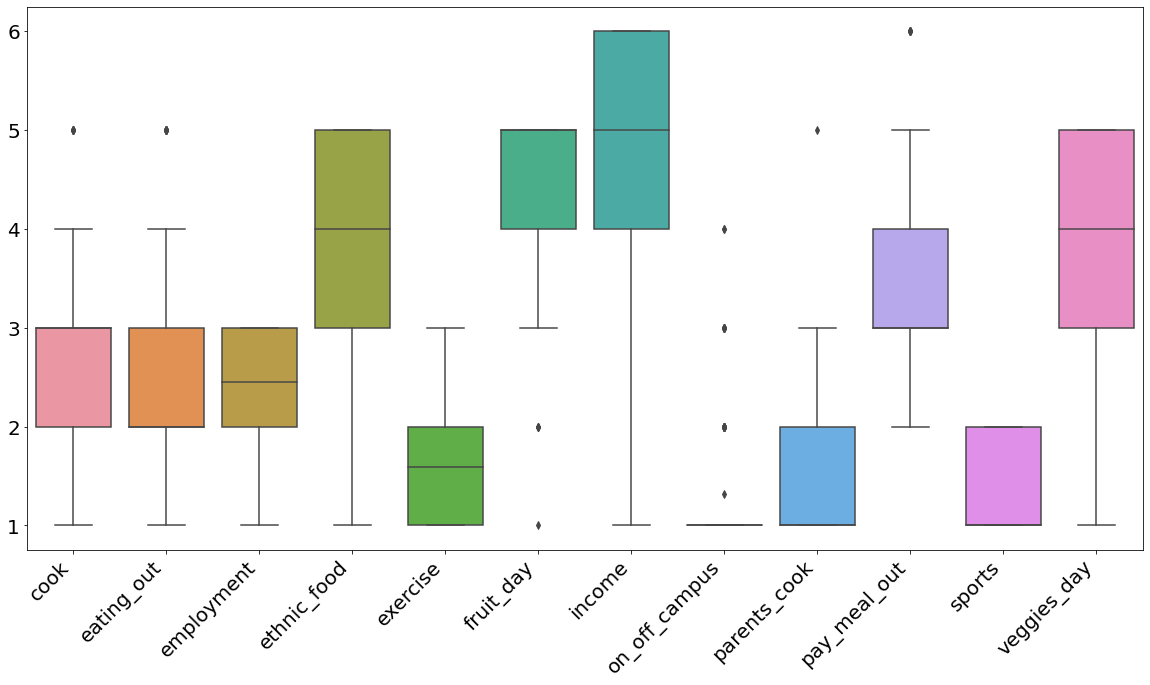

In [8]:
plt.figure(figsize=(20, 10))
sns.boxplot

ax = sns.boxplot(data = df3)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

# it seems that people prefer to eat out less regardless of income
# preference of ethinc food seems to increased with the income
# people eat more fruits with more income(according to data at least)


In [9]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df3)
df3['Cluster']=kmeans.labels_

C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13928/666216582.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13928/666216582.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])
C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13928/666216582.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])


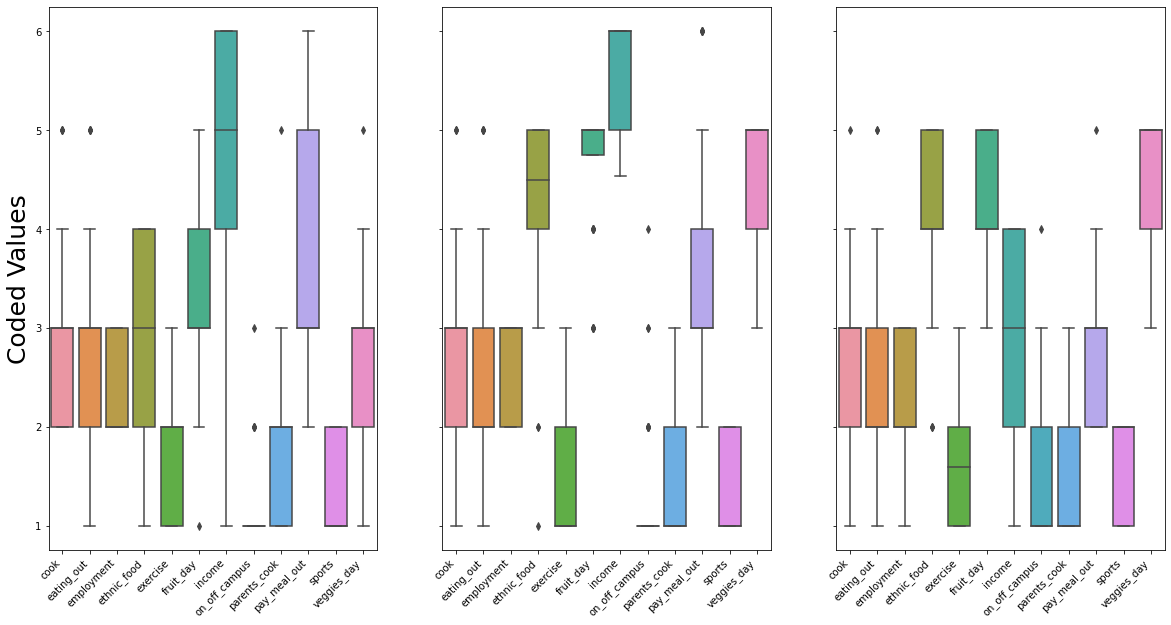

In [10]:
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=25)

for k in range(kclusters):
     plt.sca(axes[k])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(data = df3[df3['Cluster'] == k].drop('Cluster',1), ax=axes[k])
        
plt.show()

# People with less income
1. people with less income(according to the data) tend to eat out less.
2. People with less income prefer to cook at home are or are more likely to cook at home.
3. People with less income eat out less often and want to buy grocries for home cook.

# People with more income
1. As the income people increases(according to the data) their preference for ethnic food increases.
2. It is the same with food, they want to eat more fruits.
3. preference of veggies of veggies is also increased.

In conclusion the the people with less income need more shops and groceries around their place to buy veggies for home cook.

People with more need prefer to have ethnic restaurant around them, and shop to buy fruits 


# The number of clusters choose is 3 because it seems that data is nicely clustered around, income
# Any less than that the visualization is messy 
# And more than that the visualization is also messy

In [104]:
search_query = 'PG Apartments' #Search for residential locations 28.463246, 77.508332
radius = 30000 #Set the radius to 30 kilometres due to remote college location
latitude=28.364628 #College location(Galgotia's University)
longitude=77.539879
college = 'Galgotias University'

In [105]:
CLIENT_ID = 'S0KV55VKN1SDRR2B2Z1TIMA33Y230VSBQSFTQ1ASVJEUGSME'#  5O2OQN1HOFBER5CQ4VJSEBU3PZ54Z3T31EGTNFJ0V04KSKZI
CLIENT_SECRET = 'L3Y3A3KCDNGSTD32Y2XTQQ0GEVU2WVYEFXPI1RPRU2PRJFTT' # H2KIZ3QZRGZD2GVCOSSTL04SQ3N0Y5QWEWQKPQ1VTPQNF24R
VERSION = '20210604'
LIMIT = 200

In [106]:
#url2 = 'https://api.foursquare.com/v3/places/search?query=PG%20apartment&ll=28.364628%2C77.539879&radius=30000&sort=DISTANCE&limit=50'
url = f'https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={latitude},{longitude}&v={VERSION}&query={search_query}&radius={radius}&limit={LIMIT}'

In [107]:
results = requests.get(url).json()

In [108]:
results

{'meta': {'code': 200, 'requestId': '6199cd8d81030c7bd8db1c61'},
 'response': {'venues': [{'id': '535f3271498ee48607aea91a',
    'name': 'PGDM Hall',
    'location': {'lat': 28.470884323120117,
     'lng': 77.4820327758789,
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.470884323120117,
       'lng': 77.4820327758789}],
     'distance': 13114,
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['India']},
    'categories': [{'id': '4bf58dd8d48988d1a0941735',
      'name': 'College Classroom',
      'pluralName': 'College Classrooms',
      'shortName': 'Classroom',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/classroom_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1637469581',
    'hasPerk': False},
   {'id': '4ec168ae30f82a2e13d52a40',
    'name': 'Black Gold Apartments',
    'location': {'lat': 28.45514197248049,
     'lng': 77.51410488084527,
     'labeledLatLngs': [{'label': 'display',
       

In [109]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

C:\Users\ROHITS~1\AppData\Local\Temp/ipykernel_13928/2650173038.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.city,location.state,location.address,location.crossStreet,location.postalCode
0,535f3271498ee48607aea91a,PGDM Hall,"[{'id': '4bf58dd8d48988d1a0941735', 'name': 'C...",v-1637469581,False,28.470884,77.482033,"[{'label': 'display', 'lat': 28.47088432312011...",13114,IN,India,[India],NaN,NaN,NaN,NaN,NaN
1,4ec168ae30f82a2e13d52a40,Black Gold Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1637469581,False,28.455142,77.514105,"[{'label': 'display', 'lat': 28.45514197248049...",10387,IN,India,[India],NaN,NaN,NaN,NaN,NaN
2,4c80bcc7d34ca143a8ab1b80,Icon Apartments,[],v-1637469581,False,28.461677,77.515641,"[{'label': 'display', 'lat': 28.461677, 'lng':...",11060,IN,India,[India],NaN,NaN,NaN,NaN,NaN
3,57d1c577498efd6248631caf,Sai Park Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1637469581,False,28.412214,77.336770,"[{'label': 'display', 'lat': 28.412214, 'lng':...",20584,IN,India,"[Farīdābād, Haryāna, India]",Farīdābād,Haryāna,NaN,NaN,NaN
4,515da674e4b02a986c4cb74d,Madhuban Apartments Sector 82 Noida,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1637469581,False,28.528105,77.387211,"[{'label': 'display', 'lat': 28.52810497971240...",23546,IN,India,[India],NaN,NaN,NaN,NaN,NaN
5,51e4f94a498e834f69f32da2,Abhishek PG,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1637469581,False,28.541406,77.335435,"[{'label': 'display', 'lat': 28.54140570515523...",28064,IN,India,"[Sector 126 (Opposite Amity Gate 2), Noida 201...",Noida,Uttar Pradesh,Sector 126,Opposite Amity Gate 2,201304
6,50f3b79ae4b048197e793d10,Express View Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1637469581,False,28.520818,77.388815,"[{'label': 'display', 'lat': 28.52081806039613...",22824,IN,India,"[Greater Noida, India]",NaN,NaN,Greater Noida,NaN,NaN
7,50f28cb0e4b0d13e7cb9e53f,Shanti Niwas PG,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1637469581,False,28.542465,77.338409,"[{'label': 'display', 'lat': 28.54246520996093...",27941,IN,India,"[Sector 126 (Raipur), Noida 201304, Uttar Prad...",Noida,Uttar Pradesh,Sector 126,Raipur,201304
8,5b6beb7d6f0aa2002cb9e56d,pg near amity university sector 125 noida,"[{'id': '4bf58dd8d48988d1a3941735', 'name': 'C...",v-1637469581,False,28.542005,77.337828,"[{'label': 'display', 'lat': 28.54200502571147...",27945,IN,India,"[Plot Number- 10, Raipur Khadar, Noida Sector ...",noida,उत्‍तर प्रदेश,"Plot Number- 10, Raipur Khadar, Noida Sector 1...",Raipur Khadar,201303
9,4cfd15157f2db1f7ed2936d4,Aggarwal PG,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1637469581,False,28.481140,77.307317,"[{'label': 'display', 'lat': 28.4811399, 'lng'...",26202,IN,India,"[12/2 Mathura road (sector 37), Farīdābād 1210...",Farīdābād,Haryāna,12/2 Mathura road,sector 37,121003


In [110]:
venues

[{'id': '535f3271498ee48607aea91a',
  'name': 'PGDM Hall',
  'location': {'lat': 28.470884323120117,
   'lng': 77.4820327758789,
   'labeledLatLngs': [{'label': 'display',
     'lat': 28.470884323120117,
     'lng': 77.4820327758789}],
   'distance': 13114,
   'cc': 'IN',
   'country': 'India',
   'formattedAddress': ['India']},
  'categories': [{'id': '4bf58dd8d48988d1a0941735',
    'name': 'College Classroom',
    'pluralName': 'College Classrooms',
    'shortName': 'Classroom',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/classroom_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1637469581',
  'hasPerk': False},
 {'id': '4ec168ae30f82a2e13d52a40',
  'name': 'Black Gold Apartments',
  'location': {'lat': 28.45514197248049,
   'lng': 77.51410488084527,
   'labeledLatLngs': [{'label': 'display',
     'lat': 28.45514197248049,
     'lng': 77.51410488084527}],
   'distance': 10387,
   'cc': 'IN',
   'country': 'India',
   'formattedAddress

In [113]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.drop([0, 37, 17, 23, 26, 34, 28, 40],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True) #no need for those columns as we know we're in Greater Noida,IN
dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,formattedAddress,address,crossStreet,postalCode,id
1,Black Gold Apartments,Residential Building (Apartment / Condo),28.455142,77.514105,"[{'label': 'display', 'lat': 28.45514197248049...",10387,[India],NaN,NaN,NaN,4ec168ae30f82a2e13d52a40
2,Icon Apartments,None,28.461677,77.515641,"[{'label': 'display', 'lat': 28.461677, 'lng':...",11060,[India],NaN,NaN,NaN,4c80bcc7d34ca143a8ab1b80
3,Sai Park Apartments,Residential Building (Apartment / Condo),28.412214,77.336770,"[{'label': 'display', 'lat': 28.412214, 'lng':...",20584,"[Farīdābād, Haryāna, India]",NaN,NaN,NaN,57d1c577498efd6248631caf
4,Madhuban Apartments Sector 82 Noida,Residential Building (Apartment / Condo),28.528105,77.387211,"[{'label': 'display', 'lat': 28.52810497971240...",23546,[India],NaN,NaN,NaN,515da674e4b02a986c4cb74d
5,Abhishek PG,Residential Building (Apartment / Condo),28.541406,77.335435,"[{'label': 'display', 'lat': 28.54140570515523...",28064,"[Sector 126 (Opposite Amity Gate 2), Noida 201...",Sector 126,Opposite Amity Gate 2,201304,51e4f94a498e834f69f32da2
6,Express View Apartments,Residential Building (Apartment / Condo),28.520818,77.388815,"[{'label': 'display', 'lat': 28.52081806039613...",22824,"[Greater Noida, India]",Greater Noida,NaN,NaN,50f3b79ae4b048197e793d10
7,Shanti Niwas PG,Residential Building (Apartment / Condo),28.542465,77.338409,"[{'label': 'display', 'lat': 28.54246520996093...",27941,"[Sector 126 (Raipur), Noida 201304, Uttar Prad...",Sector 126,Raipur,201304,50f28cb0e4b0d13e7cb9e53f
8,pg near amity university sector 125 noida,College Residence Hall,28.542005,77.337828,"[{'label': 'display', 'lat': 28.54200502571147...",27945,"[Plot Number- 10, Raipur Khadar, Noida Sector ...","Plot Number- 10, Raipur Khadar, Noida Sector 1...",Raipur Khadar,201303,5b6beb7d6f0aa2002cb9e56d
9,Aggarwal PG,Building,28.481140,77.307317,"[{'label': 'display', 'lat': 28.4811399, 'lng'...",26202,"[12/2 Mathura road (sector 37), Farīdābād 1210...",12/2 Mathura road,sector 37,121003,4cfd15157f2db1f7ed2936d4
10,Shivlok Apartments,Residential Building (Apartment / Condo),28.422414,77.291669,"[{'label': 'display', 'lat': 28.4224137690903,...",25143,[India],NaN,NaN,NaN,55c13095498ee7997d4d5b90


In [115]:
#define coordinates of the college

def fun(dist):
    """To extract location distance from the filtered data"""
    return f"{str(dist/1000)} KM"
map_bang=folium.Map(location=[28.364628,77.539879],zoom_start=12)
# Marking College on the Map with red color.
folium.Marker([28.364628, 77.539879], popup=college, icon=folium.Icon(color='red')).add_to(map_bang) 
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
names = list(dataframe_filtered.name)
distance = list(dataframe_filtered.distance.apply(fun)) # extracting distance from the data


for lat, lng, name, dist in zip(latitudes, longitudes, names, distance):
    folium.Marker([lat, lng], popup=f"{name}, {dist}").add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

# Conclusion
1. There were no location around University, within 10 KM, and only two locations between 10 and 11 KM, that too are apartments.
2. The location data around Galgotias University is not very good, thus there might be some locations that didn't reflect in the above map
3. Students can look for apartments **around**, 'Knowledge Park' Area.
4. For better analysis need more data around the locations.
5. As we cross the 20 KM mark we start to see some PGs and more apartments, there are pgs **around** Amity university
6. You would need a transport facility to drop and pick you up from the univeristy.
7. PGs are more clustered around Noida, but they are at a distance of more than 25 KM
8. There is one more university around Galgotias University, so business owners should think about building something there, that accomodates the students there.